In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Select features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Inspect the target variable
print("Unique values in target variable before encoding:", y.unique())



Unique values in target variable before encoding: [-0.065 -0.08  -0.085 -0.075 -0.07  -0.055 -0.05  -0.04  -0.09  -0.095
 -0.11  -0.12  -0.145 -0.135 -0.105 -0.125 -0.115 -0.14  -0.13  -0.15
 -0.16  -0.195 -0.2   -0.205 -0.225 -0.255 -0.3   -0.29  -0.235 -0.035
  0.05   0.12   0.2    0.31   0.435  0.535  0.58   0.475  0.21  -0.23
 -0.25  -0.215 -0.18  -0.185 -0.165 -0.17  -0.155 -0.175 -0.19  -0.21
 -0.22  -0.245 -0.24  -0.26  -0.265 -0.28  -0.285 -0.295 -0.315 -0.31
 -0.325 -0.33  -0.305 -0.275 -0.27  -0.36  -0.355  0.015  0.065  0.115
  0.19   0.3    0.41   0.495  0.485  0.36   0.105 -0.35  -0.45  -0.47
 -0.395 -0.345 -0.32  -0.335 -0.365 -0.37  -0.39  -0.4   -0.385 -0.41
 -0.42  -0.405 -0.375  0.025  0.145  0.26   0.375  0.505  0.635  0.705
  0.61   0.32  -0.045 -0.415 -0.425  0.035  0.13   0.24   0.37   0.655
  0.545  0.23  -0.34  -0.38  -0.02   0.04   0.11   0.22   0.35   0.44
  0.395  0.155  0.095  0.185  0.315  0.45   0.515  0.175 -0.1    0.085
  0.195  0.305  0.42   0.565  0.8 

In [2]:
# Check if the target variable is categorical and encode it if necessary
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
else:
    # Ensure the target variable is integer type
    y = y.astype(int)

# Inspect the target variable after encoding
print("Unique values in target variable after encoding:", pd.Series(y).unique())



Unique values in target variable after encoding: [ 0 -1  1 -2]


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)



SVC(random_state=42)

In [4]:
# Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.00      0.00      0.00        43
           0       1.00      1.00      1.00    129938
           1       0.00      0.00      0.00        18

    accuracy                           1.00    130000
   macro avg       0.50      0.50      0.50    130000
weighted avg       1.00      1.00      1.00    130000



C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Confusion Matrix:
[[     1      0      0      0]
 [     0      0     43      0]
 [     0      0 129938      0]
 [     0      0     18      0]]


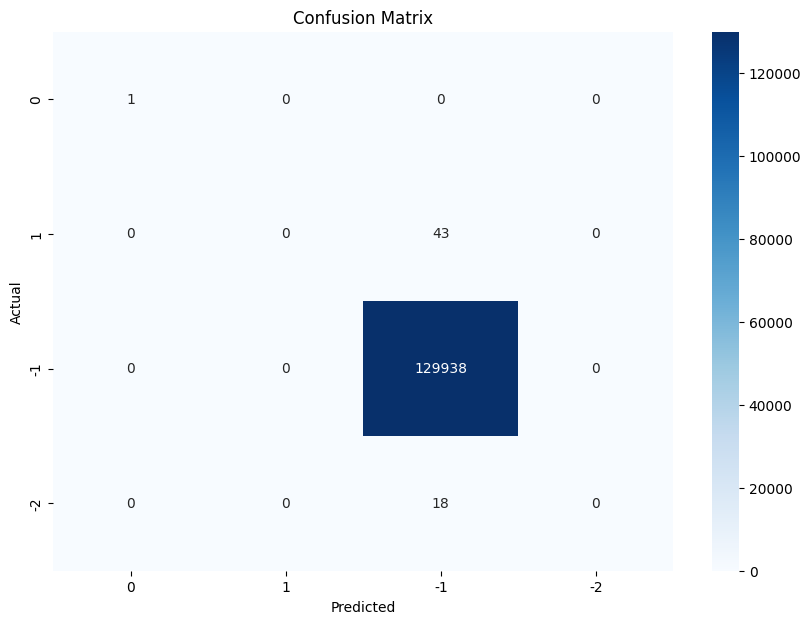

In [5]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()